In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

2021-12-06 22:22:48.800750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 22:22:48.800799: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Data Processing

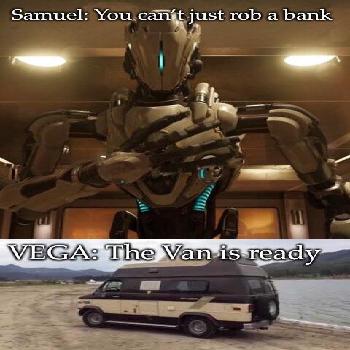

In [2]:
from tensorflow.keras.preprocessing.image import load_img
path = './dataset/train/doom'
name = '0al47gmk8xs41.jpg'
fullname = f'{path}/{name}'
load_img(fullname)
img = load_img(fullname, target_size=(350, 350))
img

In [3]:
x = np.array(img)
x.shape

(350, 350, 3)

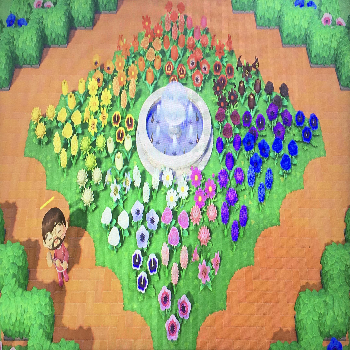

In [4]:
from tensorflow.keras.preprocessing.image import load_img
path = './dataset/train/animal_crossing'
name = '0czcmw8rmsz41.jpg'
fullname = f'{path}/{name}'
load_img(fullname)
img = load_img(fullname, target_size=(350, 350))
img

In [5]:
x = np.array(img)
x.shape

(350, 350, 3)

## Xception

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './dataset/train',
    target_size=(350, 350),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './dataset/val',
    target_size=(350, 350),
    batch_size=32
)

Found 1277 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [7]:
base_model = Xception(
    include_top=False,
    input_shape=x.shape
)

base_model.trainable = False

inputs = keras.Input(shape=x.shape)

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

xception_model = keras.Model(inputs, outputs)
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

xception_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
xception_history = xception_model.fit(train_ds, epochs=5, validation_data=val_ds)

2021-12-06 22:22:54.918312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-06 22:22:54.918345: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-06 22:22:54.918370: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kenwu-Lenovo-Z51-70): /proc/driver/nvidia/version does not exist
2021-12-06 22:22:54.918652: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
40/40 [==============================] - 488s 12s/step - loss: 0.4700 - accuracy: 0.7815 - val_loss: 0.3154 - val_accuracy: 0.8428
Epoch 2/5
40/40 [==============================] - 480s 12s/step - loss: 0.2804 - accuracy: 0.8731 - val_loss: 0.2665 - val_accuracy: 0.8742
Epoch 3/5
40/40 [==============================] - 483s 12s/step - loss: 0.2469 - accuracy: 0.8880 - val_loss: 0.3488 - val_accuracy: 0.8428
Epoch 4/5
40/40 [==============================] - 476s 12s/step - loss: 0.2183 - accuracy: 0.9146 - val_loss: 0.3202 - val_accuracy: 0.8553
Epoch 5/5
40/40 [==============================] - 478s 12s/step - loss: 0.2027 - accuracy: 0.9154 - val_loss: 0.3599 - val_accuracy: 0.8679


## Data Augmentation - Xception

In [8]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './dataset/train',
    target_size=(350, 350),
    batch_size=32
)

xception_history = xception_model.fit(train_ds, epochs=5, validation_data=val_ds)

Found 1277 images belonging to 2 classes.
Epoch 1/5
40/40 [==============================] - 494s 12s/step - loss: 0.2945 - accuracy: 0.8677 - val_loss: 0.2976 - val_accuracy: 0.8742
Epoch 2/5
40/40 [==============================] - 488s 12s/step - loss: 0.2530 - accuracy: 0.8841 - val_loss: 0.2547 - val_accuracy: 0.8868
Epoch 3/5
40/40 [==============================] - 484s 12s/step - loss: 0.2807 - accuracy: 0.8872 - val_loss: 0.2628 - val_accuracy: 0.8868
Epoch 4/5
40/40 [==============================] - 491s 12s/step - loss: 0.2365 - accuracy: 0.8912 - val_loss: 0.2663 - val_accuracy: 0.8805
Epoch 5/5
40/40 [==============================] - 486s 12s/step - loss: 0.2330 - accuracy: 0.8990 - val_loss: 0.2876 - val_accuracy: 0.8742


In [9]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dataset/test',
    target_size=(350, 350),
    batch_size=32
)

xception_score = xception_model.evaluate(test_ds)[1]

Found 161 images belonging to 2 classes.
6/6 [==============================] - 54s 8s/step - loss: 0.2557 - accuracy: 0.9006


## VGG16

In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

base_model = VGG16(
    include_top=False,
    input_shape=x.shape
)

base_model.trainable = False

inputs = keras.Input(shape=x.shape)

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

vgg_model = keras.Model(inputs, outputs)
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

vgg_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
vgg_history = vgg_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5


2021-12-06 23:45:39.267889: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.
2021-12-06 23:45:39.997861: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.


 1/40 [..............................] - ETA: 17:23 - loss: 0.7261 - accuracy: 0.5312

2021-12-06 23:46:03.285646: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.
2021-12-06 23:46:03.995502: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.


 2/40 [>.............................] - ETA: 15:10 - loss: 0.6957 - accuracy: 0.5625

2021-12-06 23:46:27.235848: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.


40/40 [==============================] - 1126s 28s/step - loss: 0.5700 - accuracy: 0.7110 - val_loss: 0.4382 - val_accuracy: 0.7925
Epoch 2/5
40/40 [==============================] - 1123s 28s/step - loss: 0.4411 - accuracy: 0.7894 - val_loss: 0.3939 - val_accuracy: 0.8239
Epoch 3/5
40/40 [==============================] - 1121s 28s/step - loss: 0.3936 - accuracy: 0.8332 - val_loss: 0.4193 - val_accuracy: 0.7925
Epoch 4/5
40/40 [==============================] - 1122s 28s/step - loss: 0.3701 - accuracy: 0.8442 - val_loss: 0.3642 - val_accuracy: 0.8553
Epoch 5/5
40/40 [==============================] - 1119s 28s/step - loss: 0.3660 - accuracy: 0.8379 - val_loss: 0.3969 - val_accuracy: 0.8050


## Data Augmentation - VGG

In [11]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './dataset/train',
    target_size=(350, 350),
    batch_size=32
)

vgg_history = vgg_model.fit(train_ds, epochs=5, validation_data=val_ds)

Found 1277 images belonging to 2 classes.
Epoch 1/5
40/40 [==============================] - 1118s 28s/step - loss: 2.7026 - accuracy: 0.8418 - val_loss: 0.6868 - val_accuracy: 0.6918
Epoch 2/5
40/40 [==============================] - 1115s 28s/step - loss: 1.4606 - accuracy: 0.8669 - val_loss: 0.5167 - val_accuracy: 0.7170
Epoch 3/5
40/40 [==============================] - 1115s 28s/step - loss: 1.0982 - accuracy: 0.8802 - val_loss: 0.4614 - val_accuracy: 0.7987
Epoch 4/5
40/40 [==============================] - 1115s 28s/step - loss: 0.8392 - accuracy: 0.8951 - val_loss: 0.6712 - val_accuracy: 0.6101
Epoch 5/5
40/40 [==============================] - 1114s 28s/step - loss: 0.7995 - accuracy: 0.8692 - val_loss: 0.4766 - val_accuracy: 0.8050


In [12]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dataset/test',
    target_size=(350, 350),
    batch_size=32
)

vgg_score = vgg_model.evaluate(test_ds)[1]

Found 161 images belonging to 2 classes.
6/6 [==============================] - 125s 20s/step - loss: 1.7290 - accuracy: 0.8882


## InceptionV3

In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

base_model = InceptionV3(
    include_top=False,
    input_shape=x.shape
)

base_model.trainable = False

inputs = keras.Input(shape=x.shape)

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

inception_model = keras.Model(inputs, outputs)
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

inception_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
inception_history = inception_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
40/40 [==============================] - 304s 7s/step - loss: 7.6673 - accuracy: 0.5881 - val_loss: 0.7704 - val_accuracy: 0.4780
Epoch 2/5
40/40 [==============================] - 300s 7s/step - loss: 3.9670 - accuracy: 0.6273 - val_loss: 0.7623 - val_accuracy: 0.4906
Epoch 3/5
40/40 [==============================] - 298s 7s/step - loss: 3.3383 - accuracy: 0.6531 - val_loss: 0.7297 - val_accuracy: 0.5220
Epoch 4/5
40/40 [==============================] - 300s 7s/step - loss: 2.3929 - accuracy: 0.6476 - val_loss: 0.6945 - val_accuracy: 0.5283
Epoch 5/5
40/40 [==============================] - 298s 7s/step - loss: 3.3566 - accuracy: 0.6296 - val_loss: 1.1037 - val_accuracy: 0.4780


## Data Augmentation - Inception

In [14]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './dataset/train',
    target_size=(350, 350),
    batch_size=32
)

inception_history = inception_model.fit(train_ds, epochs=5, validation_data=val_ds)

Found 1277 images belonging to 2 classes.
Epoch 1/5
40/40 [==============================] - 300s 7s/step - loss: 0.7299 - accuracy: 0.6445 - val_loss: 0.5181 - val_accuracy: 0.7799
Epoch 2/5
40/40 [==============================] - 301s 7s/step - loss: 0.4602 - accuracy: 0.7917 - val_loss: 0.4120 - val_accuracy: 0.8365
Epoch 3/5
40/40 [==============================] - 300s 7s/step - loss: 0.4028 - accuracy: 0.8285 - val_loss: 0.3799 - val_accuracy: 0.8302
Epoch 4/5
40/40 [==============================] - 300s 7s/step - loss: 0.3665 - accuracy: 0.8504 - val_loss: 0.3651 - val_accuracy: 0.8176
Epoch 5/5
40/40 [==============================] - 300s 7s/step - loss: 0.3571 - accuracy: 0.8449 - val_loss: 0.3539 - val_accuracy: 0.8113


In [15]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dataset/test',
    target_size=(350, 350),
    batch_size=32
)

inception_score = inception_model.evaluate(test_ds)[1]

Found 161 images belonging to 2 classes.
6/6 [==============================] - 32s 5s/step - loss: 0.3269 - accuracy: 0.8634


## Model Selection

In [16]:
model_performance = {xception_model : xception_score, inception_model : inception_score, vgg_model : vgg_score}
max_model = max(model_performance, key=model_performance.get)
max_model.save('model.h5')

/home/kenwu/miniconda3/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Model Converstion

In [17]:
import tensorflow.lite as tflite

model = keras.models.load_model('model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

interpreter = tflite.Interpreter(model_path='model.tflite')

2021-12-07 03:45:10.086320: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp0iay6g4e/assets


2021-12-07 03:45:38.055348: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-07 03:45:38.055395: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-07 03:45:38.056513: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp0iay6g4e
2021-12-07 03:45:38.103121: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-12-07 03:45:38.103157: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/tmp0iay6g4e
2021-12-07 03:45:38.301867: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-12-07 03:45:39.040165: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmp0iay6g4e
2021-12-07 03:45:39.348495: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Took 129199